# Vehicle Detection using HOG and SVM

## Import Libraries and Image Dataset

In [44]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog

In [45]:
# Import Training Dataset of Images with and without Cars
import glob
car = glob.glob('Data/Car/**/*.png')
no_car = glob.glob('Data/Non-Car/**/*.png')

In [46]:
len(car)

8792

In [47]:
len(no_car)

8968

## Random Sample Image

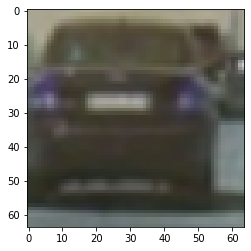

In [48]:
image_color = cv2.imread(car[222]) 
plt.imshow(image_color)

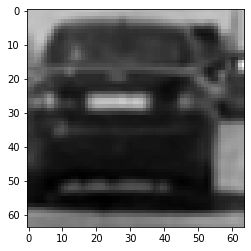

In [49]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')

## HOG Feature Extraction of Random Sample

In [50]:
features, hog_image = hog(image_gray, 
                          orientations = 11, 
                          pixels_per_cell = (16, 16), 
                          cells_per_block = (2, 2), 
                          transform_sqrt = False, 
                          visualize = True, 
                          feature_vector = True)

print(features)
#print(features.shape)

[0.12904805 0.38884538 0.14932203 0.11783479 0.19671648 0.20381633
 0.03159402 0.03001744 0.04884412 0.0511325  0.05658085 0.03428658
 0.01242989 0.01112383 0.01711867 0.17338297 0.38884538 0.15041895
 0.021448   0.01385644 0.02848573 0.01719025 0.03910345 0.06864344
 0.15182035 0.17075991 0.18794107 0.37429676 0.11049801 0.13107063
 0.06700977 0.09748053 0.01274529 0.06237346 0.0238905  0.06129743
 0.05413908 0.13468934 0.38884538 0.16578713 0.06523934 0.05848345
 0.04645746 0.05481607 0.03471961 0.01258687 0.01126432 0.01733487
 0.17557274 0.41172713 0.15231869 0.02171888 0.01403144 0.0288455
 0.01740735 0.0306011  0.01423373 0.01111276 0.03163133 0.03072335
 0.41172713 0.20775747 0.04537267 0.0359459  0.04391828 0.01187448
 0.06316121 0.02419223 0.0620716  0.05482283 0.13639043 0.41172713
 0.16788097 0.0660633  0.05922208 0.0470442  0.05550837 0.10532505
 0.11598573 0.07910044 0.08838724 0.21262452 0.41172713 0.19186579
 0.09374586 0.08043022 0.04900593 0.05319301 0.0329926  0.01534

In [51]:
hog_image.shape

(64, 64)

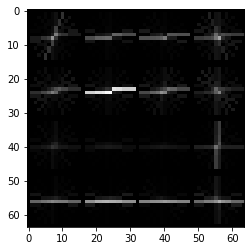

In [52]:
plt.imshow(hog_image, cmap = 'gray')

## HOG Feature Extraction and Training Dataset Creation

### Dataset of "Car" Objects

In [53]:
car_hog_accum = []

for i in car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    car_hog_feature, car_hog_img = hog(image_color[:,:,0], # Spliting the RGB Channels of the Masked Image | Syntax: [L,W,Channels] 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    car_hog_accum.append(car_hog_feature)

In [54]:
x_car = np.vstack(car_hog_accum).astype(np.float64) #Features
y_car = np.ones(len(x_car)) #Labels

In [55]:
x_car.shape

(8792, 396)

In [56]:
y_car.shape

(8792,)

In [57]:
x_car

array([[0.23287274, 0.24789392, 0.13209921, ..., 0.10625666, 0.09816828,
        0.32195828],
       [0.05335718, 0.02571364, 0.04647941, ..., 0.3160863 , 0.11917166,
        0.14638671],
       [0.06896515, 0.04857225, 0.03495124, ..., 0.03487928, 0.02938228,
        0.09433519],
       ...,
       [0.23950165, 0.23950165, 0.23950165, ..., 0.02512452, 0.0338901 ,
        0.0639983 ],
       [0.1223426 , 0.06643567, 0.05587216, ..., 0.01539296, 0.08562282,
        0.03937612],
       [0.26032061, 0.26032061, 0.26032061, ..., 0.02015374, 0.04050933,
        0.04610407]])

In [58]:
y_car

array([1., 1., 1., ..., 1., 1., 1.])

### Dataset of "Non-Car" Objects

In [59]:
nocar_hog_accum = []

for i in no_car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    nocar_hog_feature, car_hog_img = hog(image_color[:,:,0], # Spliting the RGB Channels of the Masked Image | Syntax: [L,W,Channels]
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    nocar_hog_accum.append(nocar_hog_feature)

In [60]:
x_nocar = np.vstack(nocar_hog_accum).astype(np.float64) #Features
y_nocar = np.zeros(len(x_nocar)) #Labels

In [61]:
x_nocar.shape

(8968, 396)

In [62]:
y_nocar.shape

(8968,)

In [63]:
x_nocar

array([[0.16474465, 0.15422181, 0.21066447, ..., 0.09503854, 0.01366083,
        0.        ],
       [0.16464525, 0.01857125, 0.01331274, ..., 0.02793553, 0.02318962,
        0.04273983],
       [0.0380115 , 0.00406077, 0.02724221, ..., 0.12786191, 0.06287715,
        0.00773291],
       ...,
       [0.2459994 , 0.04439202, 0.06256514, ..., 0.19053568, 0.12176874,
        0.01035717],
       [0.27490752, 0.05178615, 0.10338863, ..., 0.21859214, 0.07548087,
        0.02951171],
       [0.01538227, 0.01423638, 0.01187164, ..., 0.21006283, 0.20295313,
        0.0572817 ]])

In [64]:
y_nocar

array([0., 0., 0., ..., 0., 0., 0.])

Fuse both "Car" and "Non-Car" datasets together

In [65]:
x = np.vstack((x_car, x_nocar))
x.shape

(17760, 396)

In [66]:
y = np.hstack((y_car, y_nocar))
y.shape

(17760,)

## SVC Model Training

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101) # Train-Test Dataset Splitting (80% Training Data, 20% Testing Data)

In [68]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model = LinearSVC()
svc_model.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

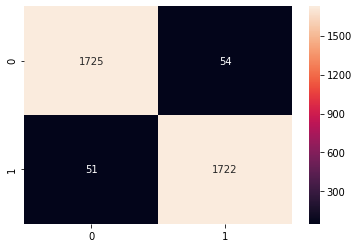

In [69]:
y_predict = svc_model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

In [70]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1779
         1.0       0.97      0.97      0.97      1773

    accuracy                           0.97      3552
   macro avg       0.97      0.97      0.97      3552
weighted avg       0.97      0.97      0.97      3552



In [71]:
Model_Prediction = svc_model.predict(x_test[0:50])
Model_Prediction

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

In [72]:
Model_TrueLabel = y_test[0:50]
Model_TrueLabel

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

Compare the above two output arrays of the first 50 dataset samples for manually analysing accuracy of the trained model.

## Hyperparameters Tuning

In [73]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train,y_train)
grid.best_estimator_
grid.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.967, total=  28.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.964, total=  29.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=  28.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.965, total=  18.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.965, total=  18.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.961, total=  18.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.928, total=  37.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.935, total=  37.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.929, total=  37.4s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.608, total= 1.0min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 16.6min finished


[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.962, total=   9.5s


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1779
         1.0       0.99      0.99      0.99      1773

    accuracy                           0.99      3552
   macro avg       0.99      0.99      0.99      3552
weighted avg       0.99      0.99      0.99      3552



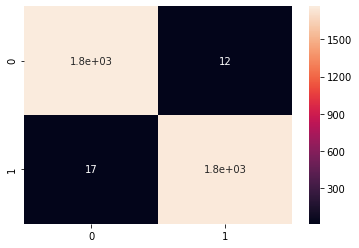

In [74]:
grid_predictions = grid.predict(x_test)
grid_test = y_test
cm = confusion_matrix(grid_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(grid_test,grid_predictions))

## Model Testing

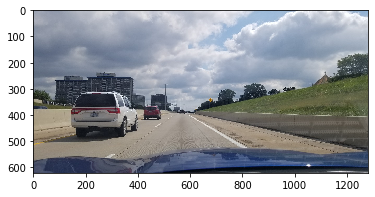

In [86]:
test_image = mpimg.imread('Test_Image.jpg')
plt.imshow(test_image)
test_image = test_image.astype(np.float32)/255

(200, 600, 3)

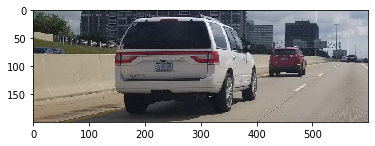

In [94]:
# Masking the Test Image
w_start = 300
w_stop = 500
l_start = 0
l_stop = 600

masked_region = test_image[w_start:w_stop,l_start:l_stop]
plt.imshow(masked_region)
masked_region.shape

In [95]:
resizing_factor = 2
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

(100, 300, 3)


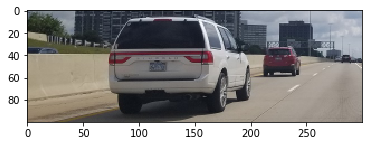

In [96]:
masked_region_resized = cv2.resize(masked_region, (np.int(L), np.int(W)))

print(masked_region_resized.shape)
plt.imshow(masked_region_resized)

(100, 300)


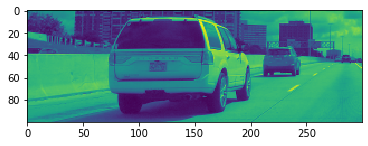

In [97]:
single_channel_image = masked_region_resized[:,:,0] # Spliting the RGB Channels of the Masked Image | Syntax: [L,W,Channels]
print(single_channel_image.shape)
plt.imshow(single_channel_image)
test_image_hog_feature_all, hog_img = hog(single_channel_image, orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualize = True, feature_vector = False)

In [104]:
pixels_in_cell = 16
HOG_orientations = 11
cells_in_block = 2
cells_in_step = 3


n_blocks_x = (single_channel_image.shape[1] // pixels_in_cell)+1  
n_blocks_y = (single_channel_image.shape[0] // pixels_in_cell)+1

#nfeat_per_block = orientations * cells_in_block **2 
blocks_in_window = (64 // pixels_in_cell)-1 
    
steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

rectangles_found = []

for xb in range(steps_x):
    for yb in range(steps_y):
        y_position = yb*cells_in_step
        x_position = xb*cells_in_step
            
        hog_feat_sample = test_image_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        print(hog_feat_sample.shape)  
        
        # Predict Cars using Trained Support Vector Machine (SVM)
        test_prediction = svc_model.predict(hog_feat_sample.reshape(1,-1))
        #test_prediction = grid.predict(hog_feat_sample.reshape(1,-1))
        
        if test_prediction == 1: 
            rectangle_x_left = np.int(x_left * resizing_factor)
            rectangle_y_top = np.int(y_top * resizing_factor)
            window_dim = np.int(64 * resizing_factor)
            rectangles_found.append(((rectangle_x_left, rectangle_y_top + w_start),(rectangle_x_left + window_dim, rectangle_y_top + window_dim + w_start)))
                

(396,)
(396,)
(396,)
(396,)
(396,)


In [105]:
rectangles_found

[((192, 300), (320, 428)), ((384, 300), (512, 428))]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


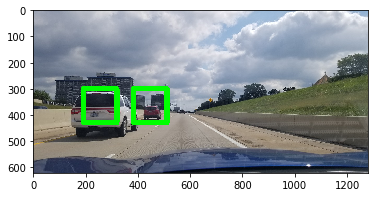

In [106]:
Image_With_Rectangles = np.copy(test_image)
    
for rectangle in rectangles_found:
    cv2.rectangle(Image_With_Rectangles, rectangle[0], rectangle[1], (0, 255, 0), 20)

plt.imshow(Image_With_Rectangles)
        